# Цель:
- отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска

# Задачи:
- первичная обработка данных
- оценка числовых переменных
- преобразование данных
- корреляционный анализ количественных переменных, отбор некоррелирующих переменных
- анализ номинативных переменных, влияющих на переменную score

# Описание работы:
- импорт библиотек
- чтение файла
- выявление и удаление выбросов для числовых переменных
- выявление и удаление некоррелирующих переменных
- выявление и удаление номинативных переменных, не влияющих на оценку

## Импортируем нужные для чтения и анализа библиотеки и прочитаем файл

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.xls')

#### Разброс по числовым переменным в общем виде

In [3]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


#### Функция по получению информации по числовым переменным

In [4]:
def info(column):
    print(df[column].hist())
    print(df[column].describe())
    print(df[column].value_counts())

# Посмотрим на распределение признаков для числовых переменных и устраним выбросы при необходимости

 #### age - Возраст ученика (от 15 до 22)

Всё в порядке

AxesSubplot(0.125,0.125;0.775x0.755)
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


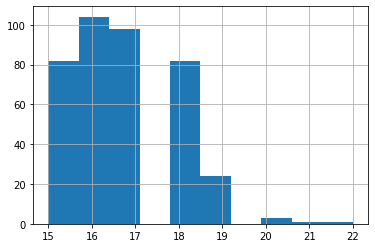

In [5]:
info('age')

#### Medu - Образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Всё в порядке

AxesSubplot(0.125,0.125;0.775x0.755)
count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64


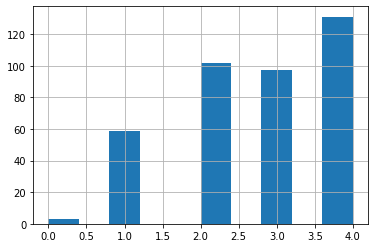

In [6]:
info('Medu')

#### Fedu - Образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Присутствует выброс, т.к. 40 находится за пределами значений

AxesSubplot(0.125,0.125;0.775x0.755)
count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64


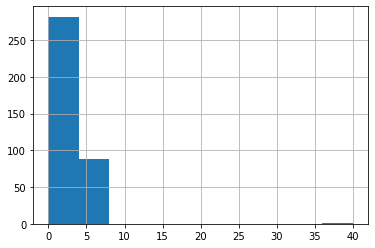

In [7]:
info('Fedu')

Убираем выброс

In [8]:
df.Fedu = df.Fedu.apply(lambda x: x if x <= 4 else None)

#### traveltime - Время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

Всё в порядке

AxesSubplot(0.125,0.125;0.775x0.755)
count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


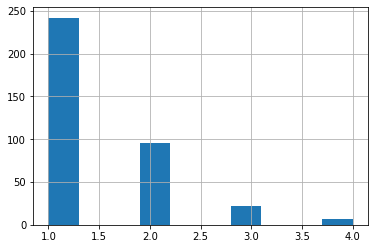

In [9]:
info('traveltime')

#### studytime - время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

Всё в порядке

AxesSubplot(0.125,0.125;0.775x0.755)
count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64


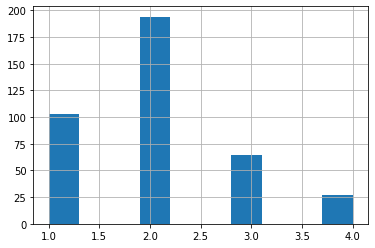

In [10]:
info('studytime')

#### failures - количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

Все в порядке

AxesSubplot(0.125,0.125;0.775x0.755)
count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64


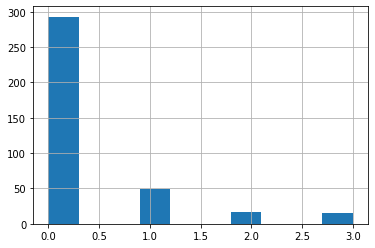

In [11]:
info('failures')

#### studytime, granular

Всё в порядке

AxesSubplot(0.125,0.125;0.775x0.755)
count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64
-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64


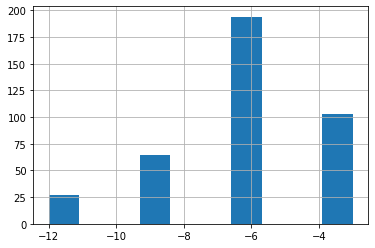

In [12]:
info('studytime, granular')

#### famrel - семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Присутствует выброс, т.к. -1 выходит за пределы значений 

AxesSubplot(0.125,0.125;0.775x0.755)
count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64


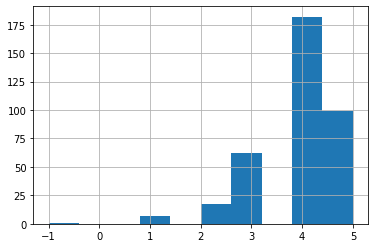

In [13]:
info('famrel')

Убираем выброс

In [14]:
df.famrel = df.famrel.apply(lambda x: x if x >= 1 else None)

#### freetime - свободное время после школы (от 1 - очень мало до 5 - очень мого)

Все в порядке

AxesSubplot(0.125,0.125;0.775x0.755)
count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64


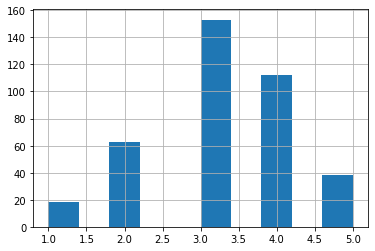

In [15]:
info('freetime')

#### goout - проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

Всё в порядке

AxesSubplot(0.125,0.125;0.775x0.755)
count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64


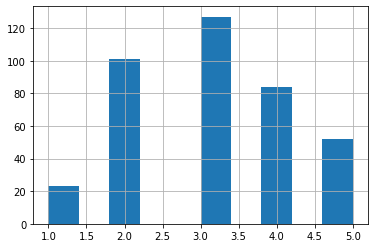

In [16]:
info('goout')

#### health - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

Всё в порядке

AxesSubplot(0.125,0.125;0.775x0.755)
count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64


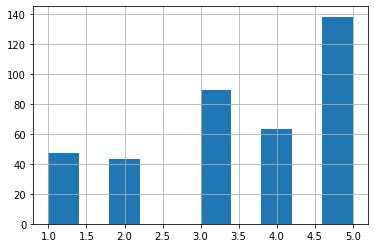

In [17]:
info('health')

#### absences - количество пропущенных занятий

Присутствует приличный разброс по пропущенным занятиям

Основное количество сконцентрировано в пределах 50

AxesSubplot(0.125,0.125;0.775x0.755)
count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64


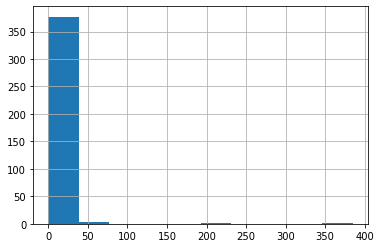

In [18]:
info('absences')

Очистим значения, превышающие 50

In [19]:
df.absences = df.absences.apply(lambda x: x if x < 50 else None)

#### score - баллы по госэкзамену по математике

Баллы нормально распределены в пределах 20-100

Балл со значением 0 является выбросом

AxesSubplot(0.125,0.125;0.775x0.755)
count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64


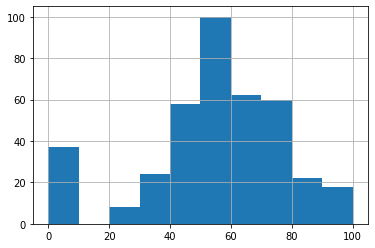

In [20]:
info('score')

Удалим строки, значения баллов которых равно 0

In [21]:
df = df[df.score != 0]

# Проведем корреляционный анализ количественных переменных

#### Построим графики зависимости переменных

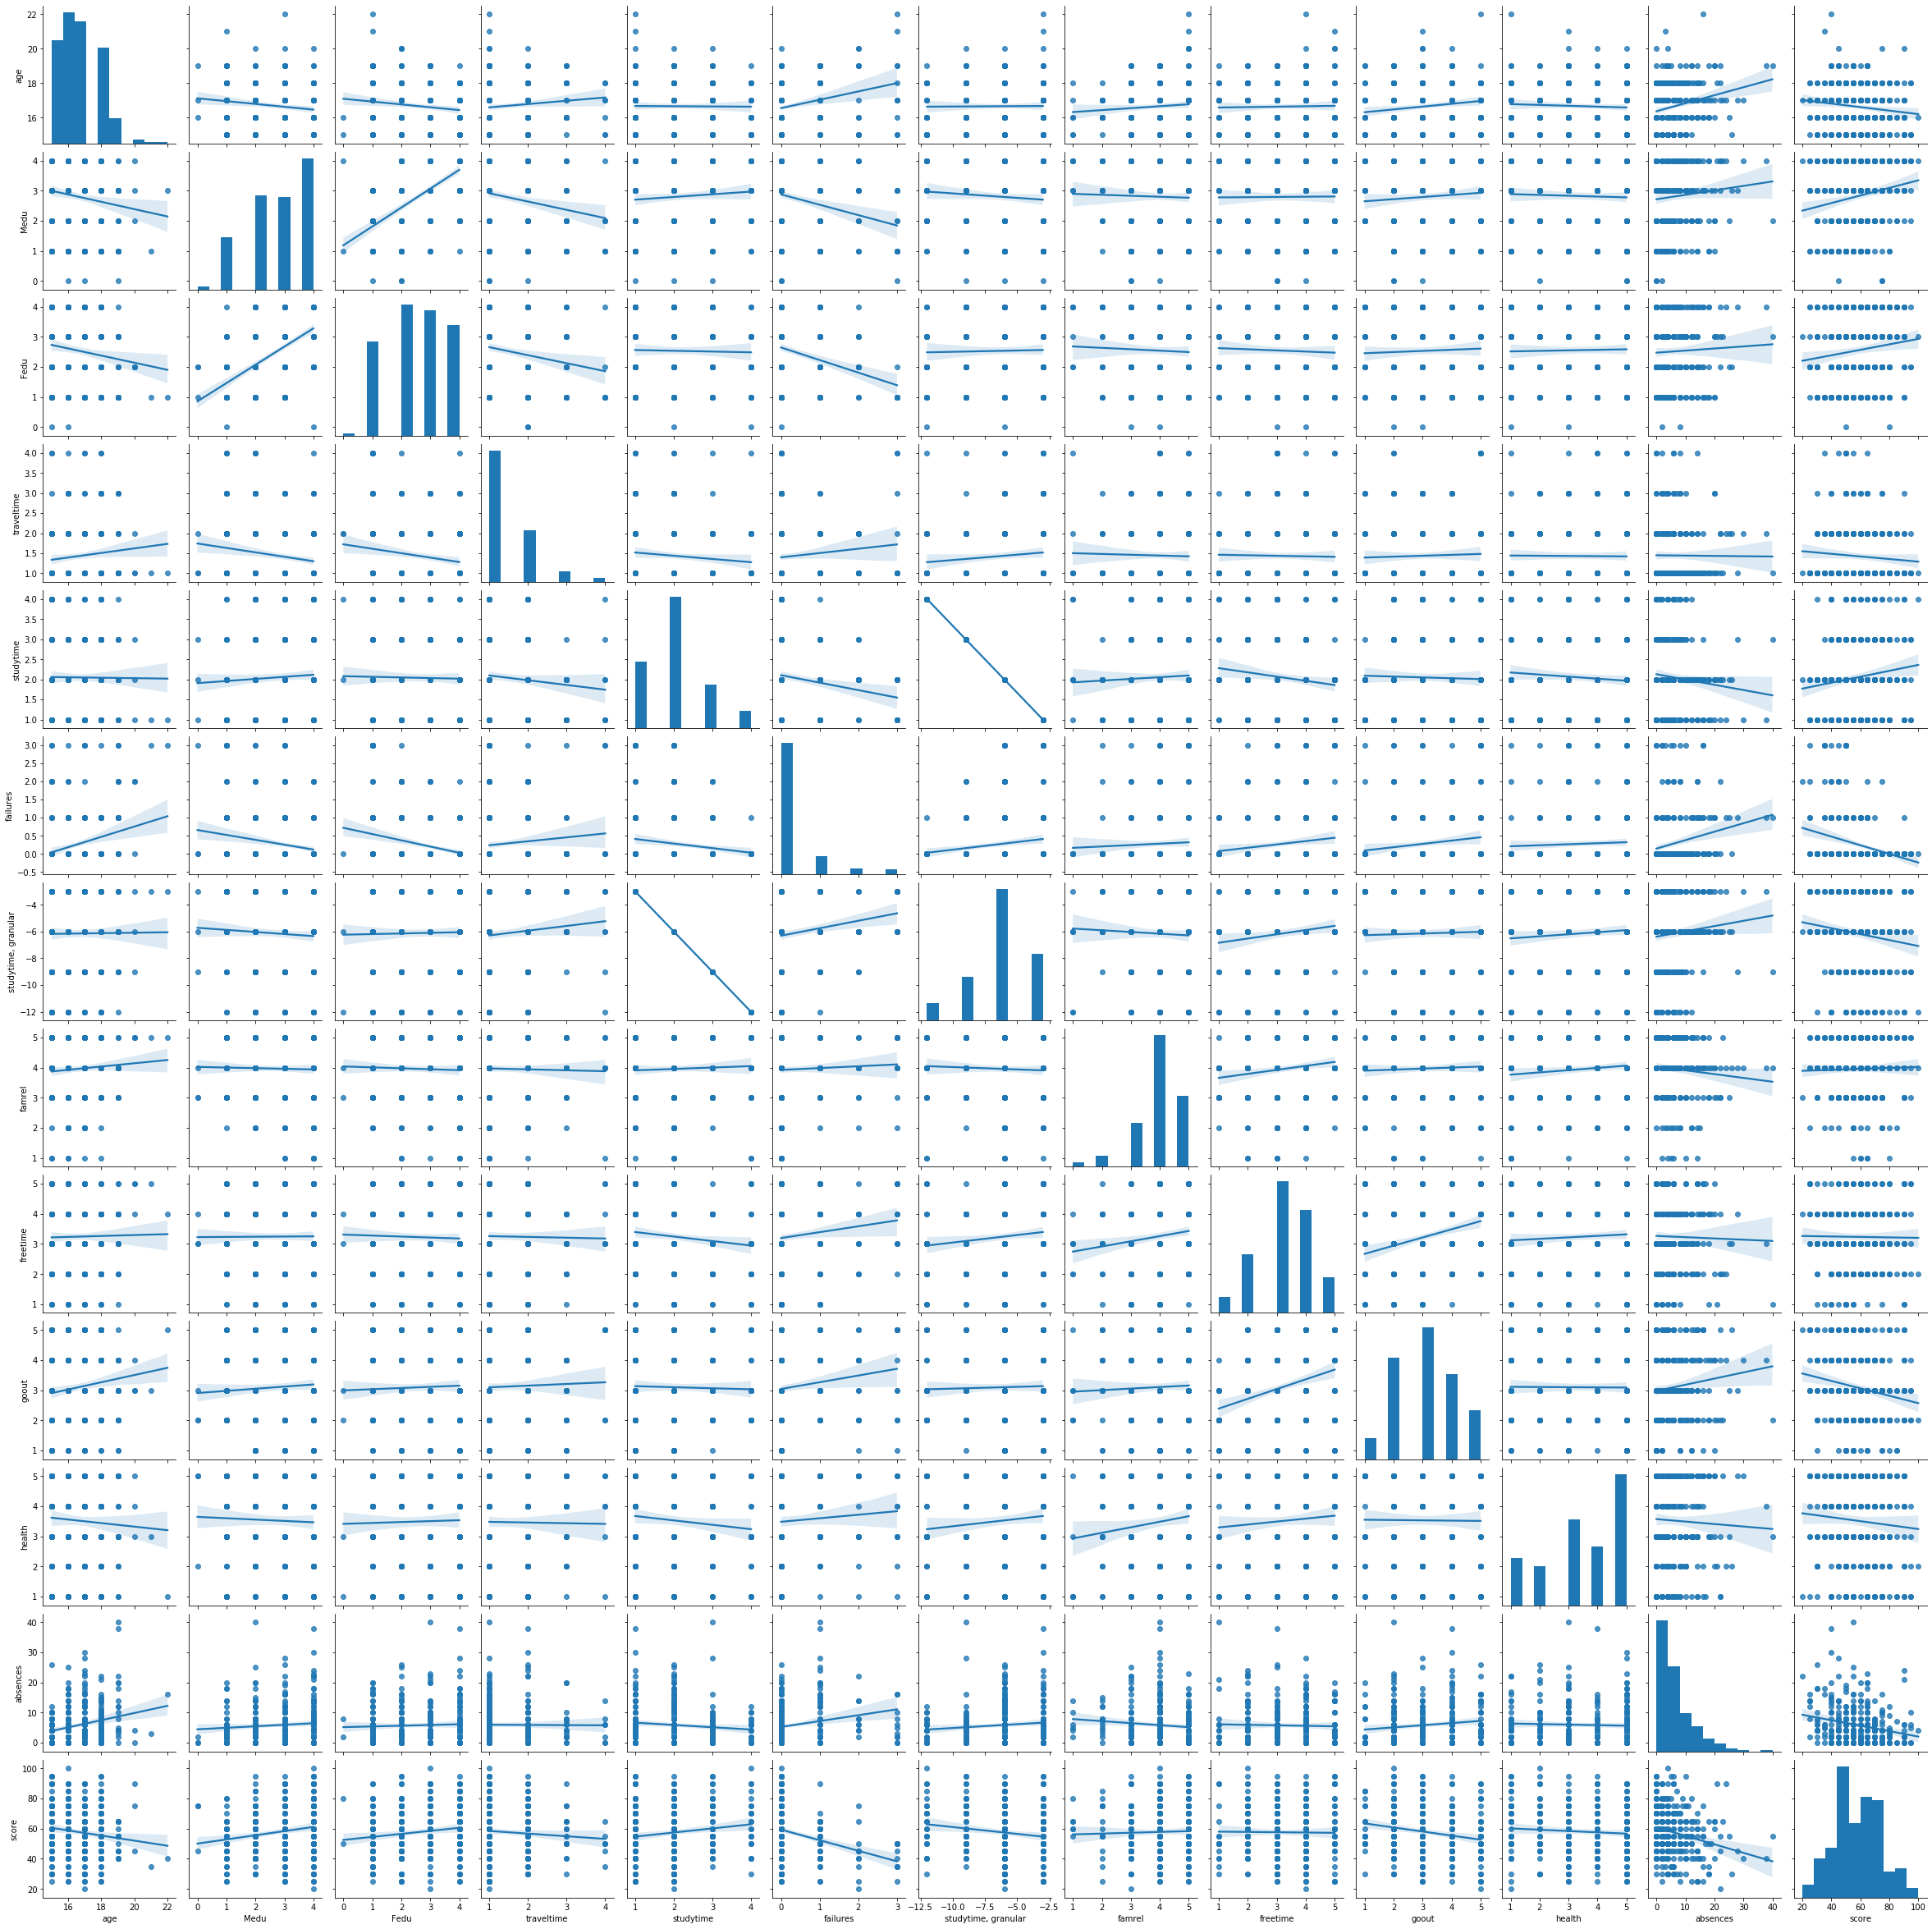

In [22]:
sns.pairplot(df, kind='reg')

#### Используем для наглядности матрицу корреляций

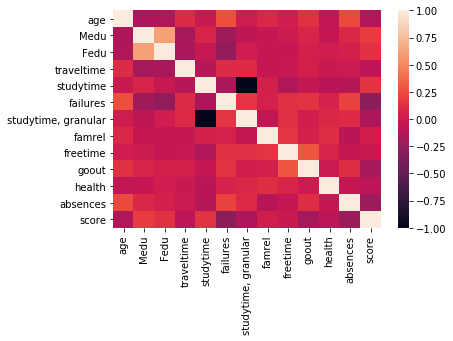

In [23]:
corr = df.corr()
sns.heatmap(corr)

Так как переменные "studytime" и "studytime, granular" скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная "studytime, granular"

In [24]:
df.drop(['studytime, granular'], inplace=True, axis=1)

# Анализ номинативных переменных

In [25]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

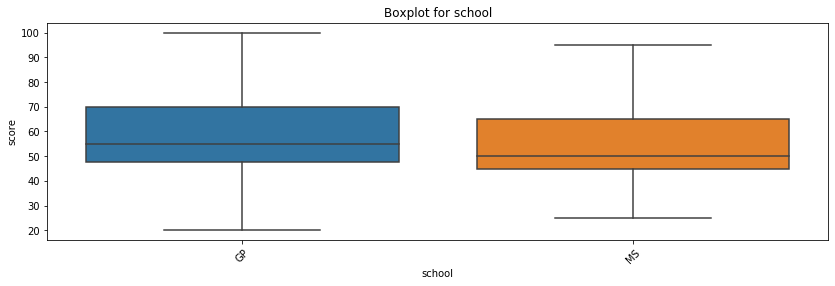

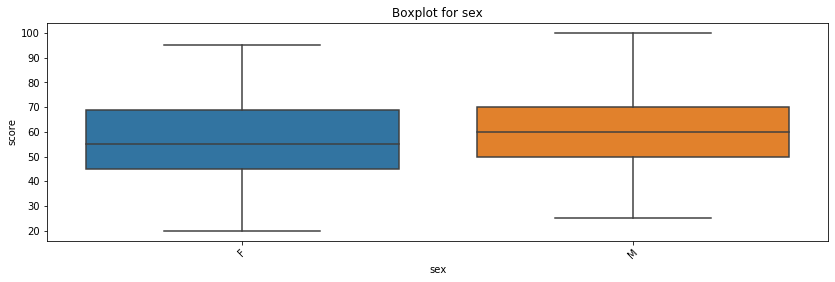

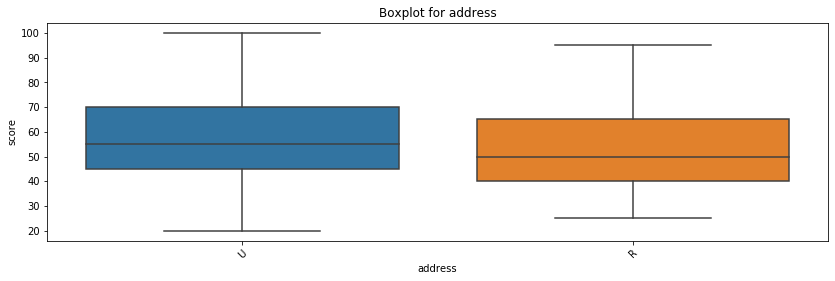

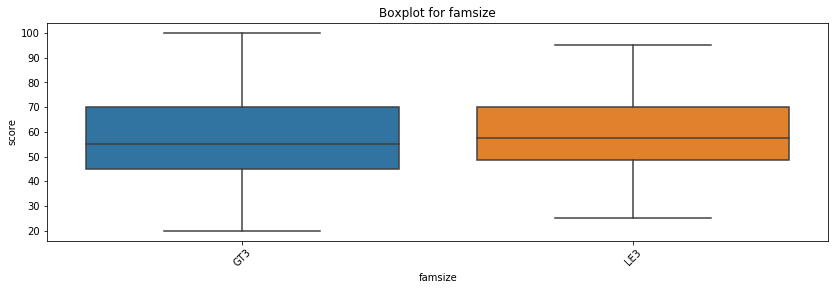

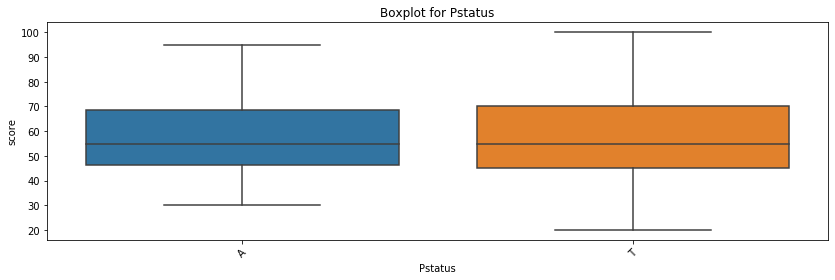

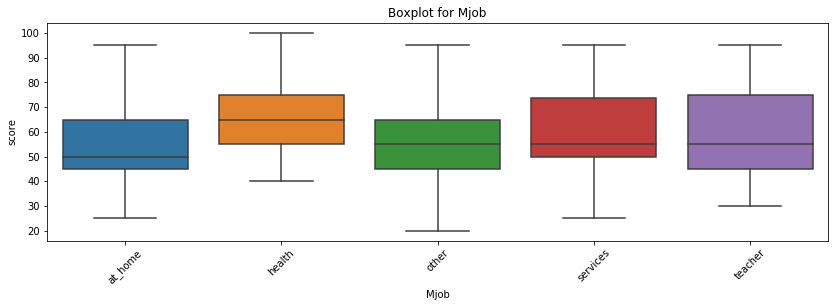

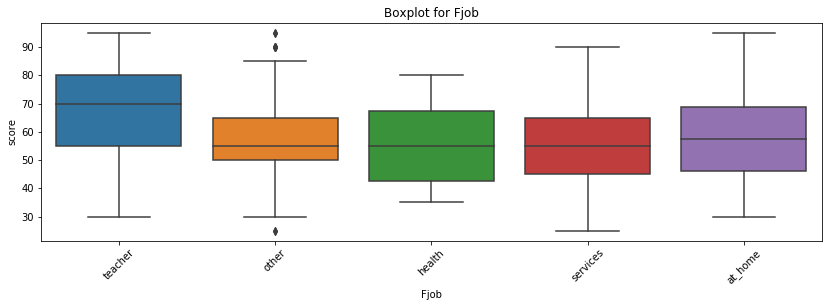

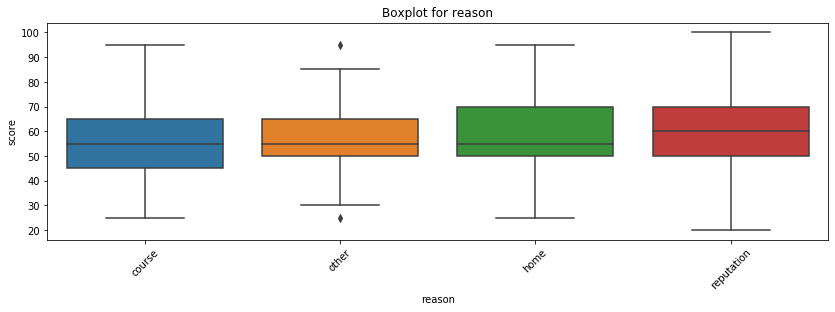

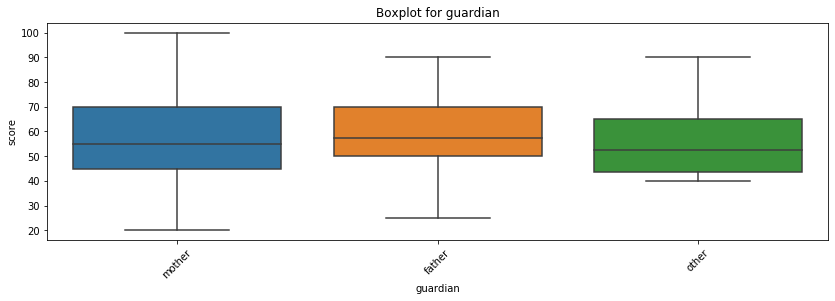

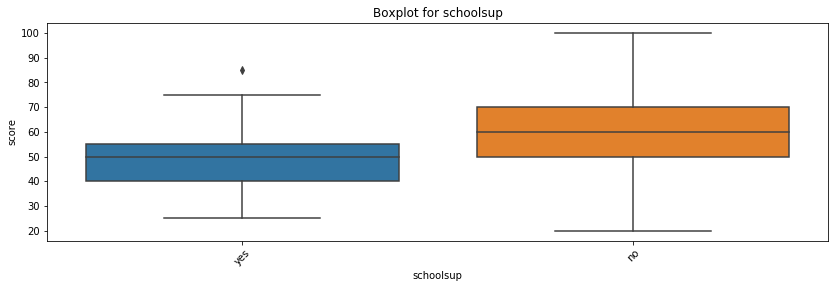

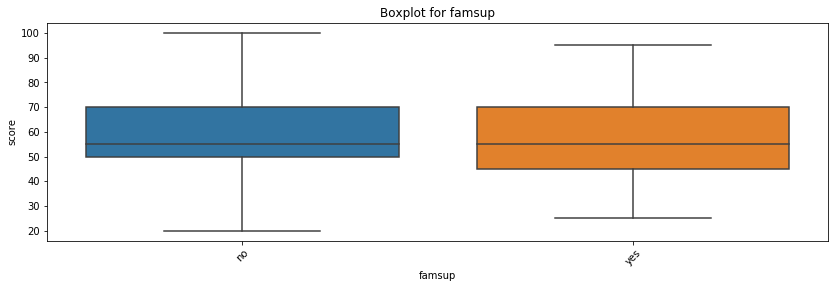

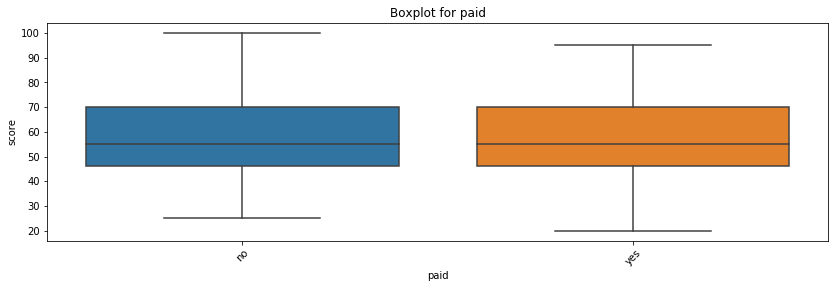

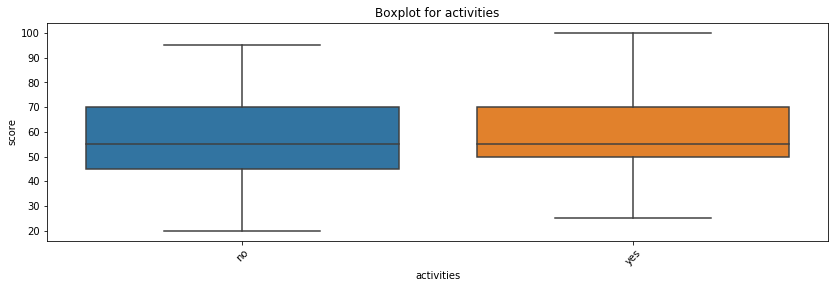

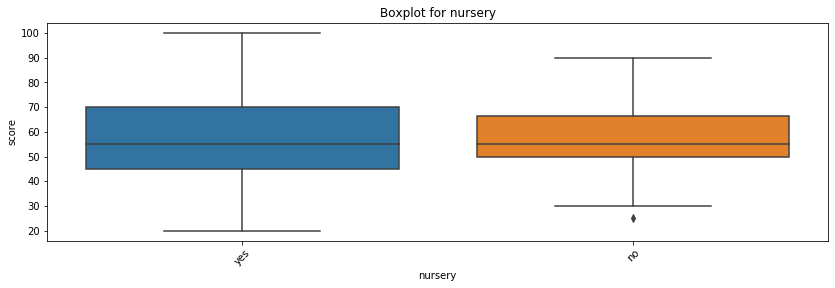

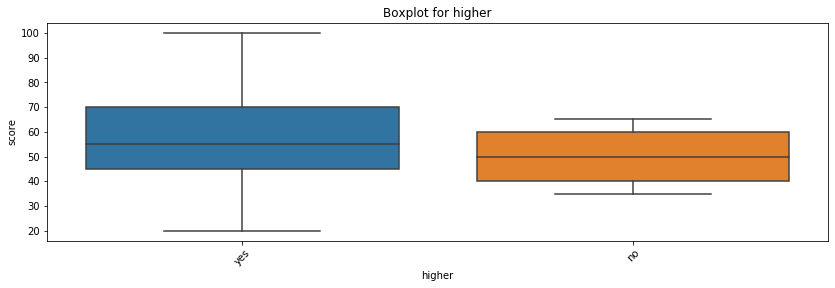

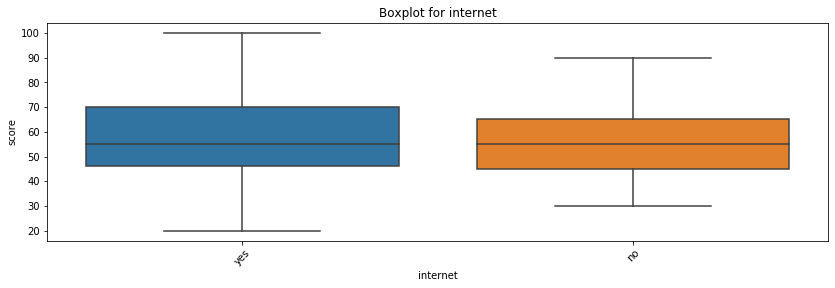

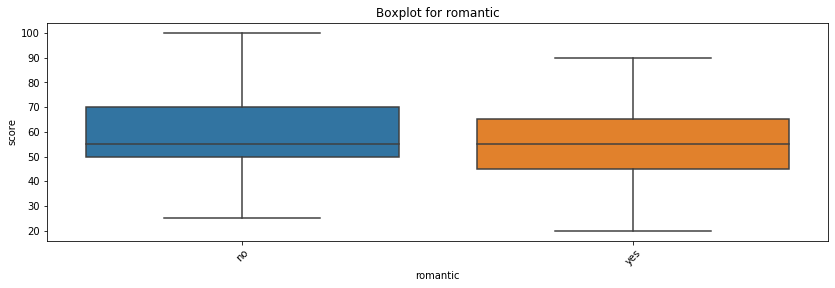

In [26]:
for col in df.columns:
    if df[col].dtypes == 'O':
        get_boxplot(col)

По графикам похоже, что все параметры, кроме "famsize", "Pstatus", "famsup", "paid", "activities", "nursery", "internet", "romantic", могут влиять на баллы по госэкзамену по математике.  

Удалим данные параметры

In [27]:
df.drop(columns=['famsize', 'Pstatus', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic'], inplace=True)

Проверим, есть ли статистическая разница в получение баллов по госэкзамену по математике по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что получение баллов по различным параметрам неразличимы

In [28]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [29]:
for col in df.columns:
    if df[col].dtypes == 'O':
        get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


C:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Как мы видим, серьезно отличается только один параметр "Mjob"

Оставим данную переменную в датасете для дальнейшего построения модели

И так, в нашем случае важные переменные, которые, возможно, оказывают влияние на балл, это:

In [30]:
df.columns

Index(['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'higher', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'score'],
      dtype='object')

In [31]:
df.head()

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,higher,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,yes,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,yes,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,4.0,3.0,2.0,5.0,4.0,50.0


# Выводы:

- в данных достаточно мало пустых значений;
- выбросы были найдены в столбцах: "Fedy", "Famrel", "absences", "score". Данные достаточно чистые;
- столбец "studytime, granular" скоррелирован почти полностью с "studytime", поэтому исключен;
- самый важный параметр, который предполагается использовать в дальнейшем для построения модели, это "Mjob", а также другие номинативные и количественные параметры, которые есть в датасете